# Análise de adimplência e inadimplência no setor bancário: prevendo e reduzindo prejuízos

Este projeto de ciência de dados tem como intuito explorar e analisar dados de crédito de uma instituição financeira com a finalidade de identificar padrões em clientes que sejam indicativos de possível tendência para a inadimplência. A base de dados é vasta e serão aplicados métodos para limpeza e preenchimento dos dados de modo que as análises sejam confiáveis.

Resolver as questões e descobrir os padrões acarretará em uma diminuição das inadimplências se as decisões corretas forem tomadas, gerando assim um retorno financeiro muito maior para a instituição e garantindo sua segurança.




## 1\. Importando

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

## 2\. Explorando os dados

### 2.1\. Estrutura

Primeiro vamos fazer uma exibição simples dos dados para uma análise dos dados gerais.

In [52]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


Agora podemos fazer uma análise gráfica primária mostrando o total de adimplentes e inadimplentes para termos uma noção com as porcentagens.

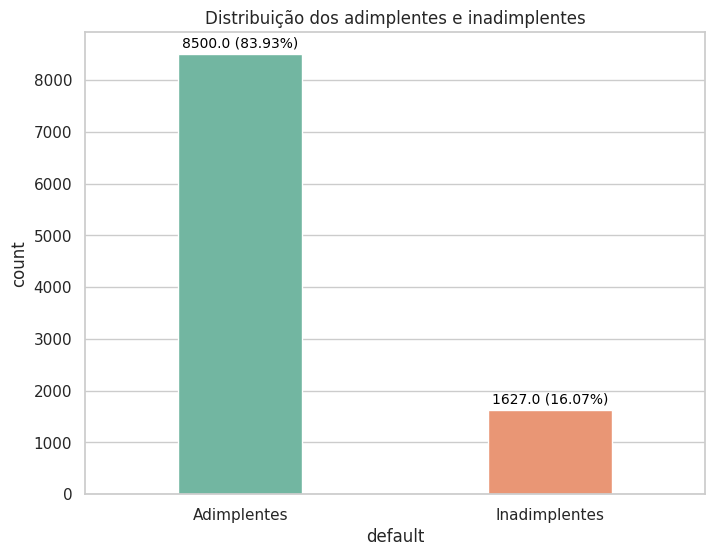

In [53]:
# Filtrar apenas os valores não nulos na coluna 'default'
df_filtered = df.dropna(subset=['default'])

# Mapear os valores 0 e 1 para 'Adimplentes' e 'Inadimplentes'
df_filtered['default'] = df_filtered['default'].map({0: 'Adimplentes', 1: 'Inadimplentes'})

# Visualizar a distribuição da variável 'default' com rótulos e contagem
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='default', data=df_filtered, palette='Set2', order=df_filtered['default'].value_counts().index, width=0.4)

# Calcular a porcentagem em relação ao total
total = len(df_filtered['default'])
percentage_labels = [(f'{p.get_height()} ({p.get_height() / total * 100:.2f}%)') for p in ax.patches]

# Adicionar rótulos, números exatos e porcentagens dentro das colunas
for p, label in zip(ax.patches, percentage_labels):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                 textcoords='offset points')

plt.title('Distribuição dos adimplentes e inadimplentes')
plt.show()

### 2.2. Dados faltantes

Agora vamos verificar quantas células estão com dados faltando em cada coluna.

In [54]:
print(df.isnull().sum())

id                            0
default                       0
idade                         0
sexo                          0
dependentes                   0
escolaridade               1519
estado_civil                749
salario_anual              1112
tipo_cartao                   0
meses_de_relacionamento       0
qtd_produtos                  0
iteracoes_12m                 0
meses_inativo_12m             0
limite_credito                0
valor_transacoes_12m          0
qtd_transacoes_12m            0
dtype: int64


Vemos que temos uma quantidade grande de dados não preenchidos em 3 colunas em específico. Vamos preencher estes dados como "nao informado" para seguir com as análises e depois conferir se a substituição de fato ocorreu.

In [55]:
columns_to_fill_na = ['escolaridade', 'estado_civil', 'salario_anual']
df[columns_to_fill_na] = df[columns_to_fill_na].fillna('nao informado')

print(df.isnull().sum())

id                         0
default                    0
idade                      0
sexo                       0
dependentes                0
escolaridade               0
estado_civil               0
salario_anual              0
tipo_cartao                0
meses_de_relacionamento    0
qtd_produtos               0
iteracoes_12m              0
meses_inativo_12m          0
limite_credito             0
valor_transacoes_12m       0
qtd_transacoes_12m         0
dtype: int64


### 2.3. Schema

Agora vamos verificar os tipos de dados que estão presentes em cada coluna.

In [56]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Como as colunas "escolaridade", "estado civil" e "salário anual" não eram numéricas, não houve problema em sua substituição por "nao informado".

Agora com os tipos descritos, conseguimos escolher quais análises utilizar.

Vamos fazer uma análise dos dados dos atributos categóricos.

In [57]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,10127,6,mestrado,3128
estado_civil,10127,4,casado,4687
salario_anual,10127,6,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


E agora uma análise dos atributos numéricos.

In [58]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


> 2.3.1 - Correção de schema






Podemos analisar nas tabelas acima que as colunas "limite_credito" e "valor_transacoes_12m" estão retornando valores numéricos mas sendo indicadas como categóricos. Isso se deve ao padrão brasileiro para valores monetários ser diferente do padrão do Python.

Vamos fazer esta correção.

In [60]:
fn = lambda valor: float(str(valor).replace(".", "").replace(",", "."))

df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Hora de conferir se as alterações foram realizadas.

In [61]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

## 3\. Visualização de dados

Primeiro vamos declarar as variáveis que indicam as quantidades de clientes adimplentes e inadimplentes.

In [62]:
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

### 3.1. Valor de transações 12 meses x Inadimplência

Vamos analisar a correlação entre inadimplência e o valor de transações nos últimos 12 meses dos clientes.  

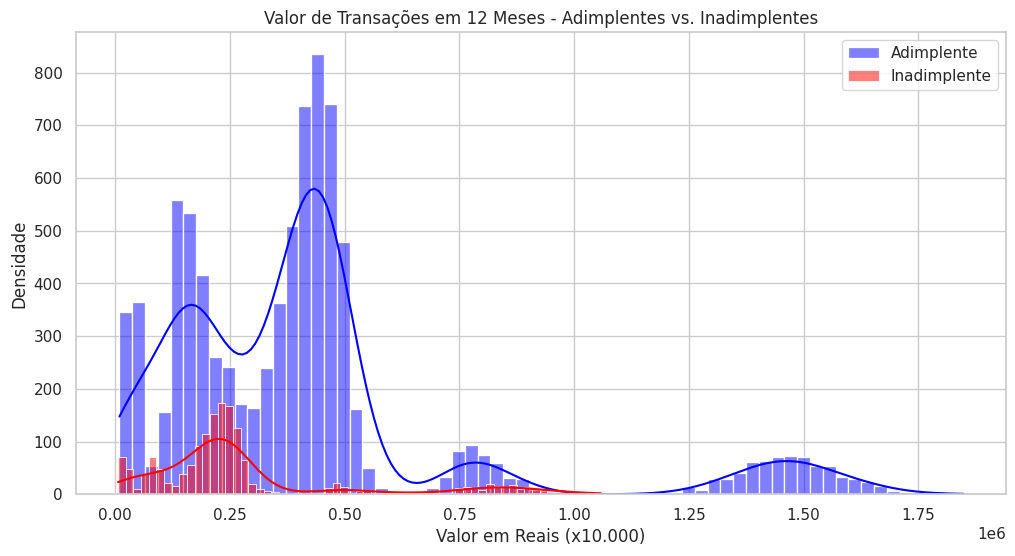

In [87]:
# Comparação de valor de transações nos últimos 12 meses entre adimplentes e inadimplentes
plt.figure(figsize=(12, 6))
plt.title('Valor de Transações em 12 Meses - Adimplentes vs. Inadimplentes')
sns.histplot(df_adimplente['valor_transacoes_12m'], color='blue', label='Adimplente', kde=True)
sns.histplot(df_inadimplente['valor_transacoes_12m'], color='red', label='Inadimplente', kde=True)
plt.xlabel('Valor em Reais (x10.000)')
plt.ylabel('Densidade')
plt.legend()
plt.show()

Podemos notar que, a princípio, **não precisamos** nos preocupar com os clientes que transicionam mais que R$11.000,00 no período de 12 meses. Vamos utilizar este dado mais a frente.

### 3.2. Escolaridade x Inadimplência

Vamos verificar a correlação entre os graus de escolaridade e a inadimplência, começando com uma análise gráfica que mostra o total de adimplentes e inadimplentes dentro de cada categoria.

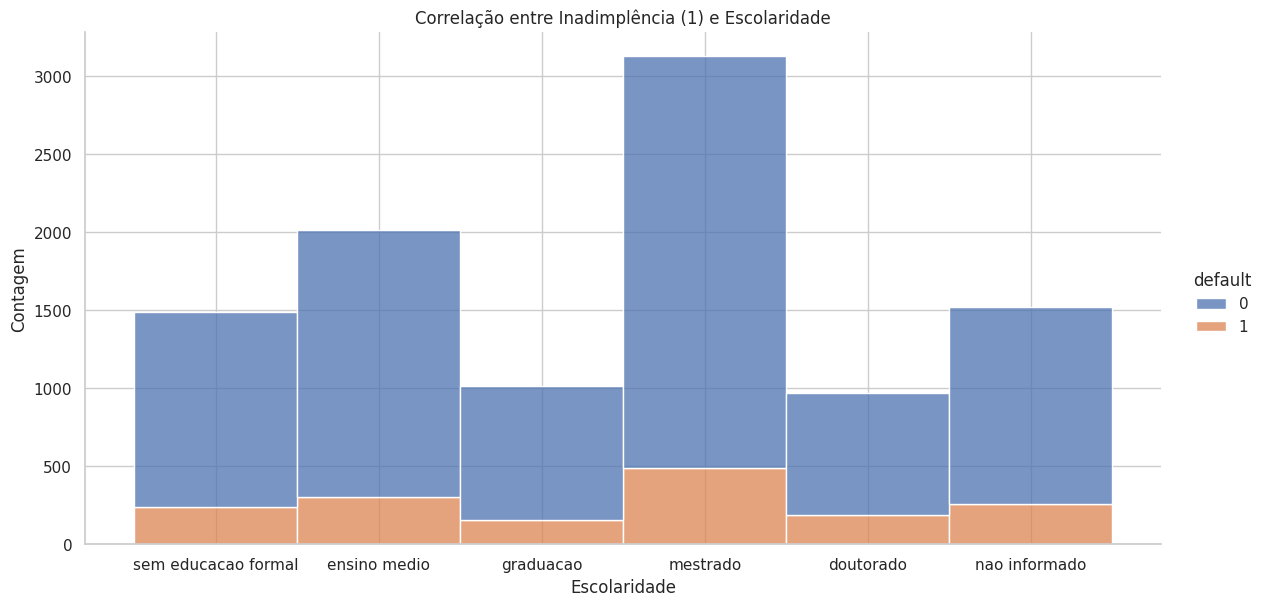

In [64]:
ordem_escolaridade = ['sem educacao formal', 'ensino medio', 'graduacao', 'mestrado', 'doutorado', 'nao informado']
df['escolaridade'] = pd.Categorical(df['escolaridade'], categories=ordem_escolaridade, ordered=True)

# Configurar o estilo do gráfico (opcional)
sns.set(style="whitegrid")

# Criar o displot
sns.displot(data=df, x='escolaridade', hue='default', multiple='stack', height=6, aspect=2)

# Adicionar rótulos e título
plt.title('Correlação entre Inadimplência (1) e Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Contagem')
plt.show()

A fim de confirmar em números o informado acima, vamos verificar as quantidades exatas e qual a porcentagem dos inadimplentes dentro do seu grupo.

In [65]:
# Calcular a contagem total de adimplentes e inadimplentes por escolaridade
contagem_adimplentes_inadimplentes_por_escolaridade = df.groupby(['escolaridade', 'default']).size().unstack()

# Reordenar as colunas na ordem desejada
contagem_adimplentes_inadimplentes_por_escolaridade = contagem_adimplentes_inadimplentes_por_escolaridade.loc[ordem_escolaridade]

# Calcular a porcentagem de inadimplentes
contagem_adimplentes_inadimplentes_por_escolaridade['Porcentagem Inadimplentes'] = (
    contagem_adimplentes_inadimplentes_por_escolaridade[1] /
    (contagem_adimplentes_inadimplentes_por_escolaridade[0] + contagem_adimplentes_inadimplentes_por_escolaridade[1]) * 100)

# Exibir os resultados
for escolaridade, (adimplentes, inadimplentes, porcentagem) in contagem_adimplentes_inadimplentes_por_escolaridade.iterrows():
    print(f'{escolaridade}: {adimplentes} Adimplentes e {inadimplentes} Inadimplentes. Porcentagem de inadimplentes: {porcentagem:.2f}%')

sem educacao formal: 1250.0 Adimplentes e 237.0 Inadimplentes. Porcentagem de inadimplentes: 15.94%
ensino medio: 1707.0 Adimplentes e 306.0 Inadimplentes. Porcentagem de inadimplentes: 15.20%
graduacao: 859.0 Adimplentes e 154.0 Inadimplentes. Porcentagem de inadimplentes: 15.20%
mestrado: 2641.0 Adimplentes e 487.0 Inadimplentes. Porcentagem de inadimplentes: 15.57%
doutorado: 780.0 Adimplentes e 187.0 Inadimplentes. Porcentagem de inadimplentes: 19.34%
nao informado: 1263.0 Adimplentes e 256.0 Inadimplentes. Porcentagem de inadimplentes: 16.85%


É possível verificar que a porcentagem de **inadimplentes** é semelhante, exceto no grupo 'doutorado'. Este tem um número maior em relação ao total das amostras do seu grupo.

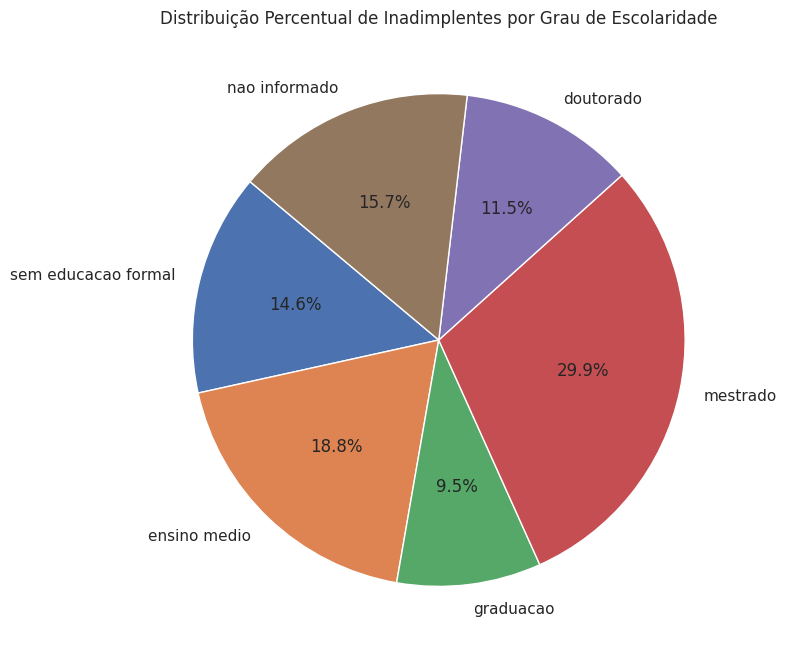

In [66]:
# Calcular o total de inadimplentes
total_inadimplentes = contagem_adimplentes_inadimplentes_por_escolaridade[1].sum()

# Criar um gráfico de pizza para mostrar a distribuição percentual de inadimplentes por grau de escolaridade
plt.figure(figsize=(10, 8))
plt.pie(contagem_adimplentes_inadimplentes_por_escolaridade[1], labels=contagem_adimplentes_inadimplentes_por_escolaridade.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Percentual de Inadimplentes por Grau de Escolaridade')
plt.show()

Apesar do grau 'doutorado' ter uma porcentagem maior dentro de sua amostra, verifica-se no gráfico acima que representam menos em valores absolutos de inadimplentes.

É necessário que sejam feitas **ações direcionadas** principalmente para os clientes com grau de **mestrado** e **ensino médio**, pois representam as maiores fatias no total de inadimplentes. Contudo, é necessária atenção da equipe para os planos tomados com os de grau 'doutorado', pois retornam uma porcentagem alta de inadimplência entre eles. Possivelmente os produtos e planos oferecidos estejam sendo muito agressivos para esse grupo em específico.

### 3.3. Salário anual x Inadimplência

Uma das variáveis que intuitivamente a maioria de nós associamos com a inadimplência é o salário anual do cliente. Podemos verificar nas informações abaixo se realmente existe essa correlação.

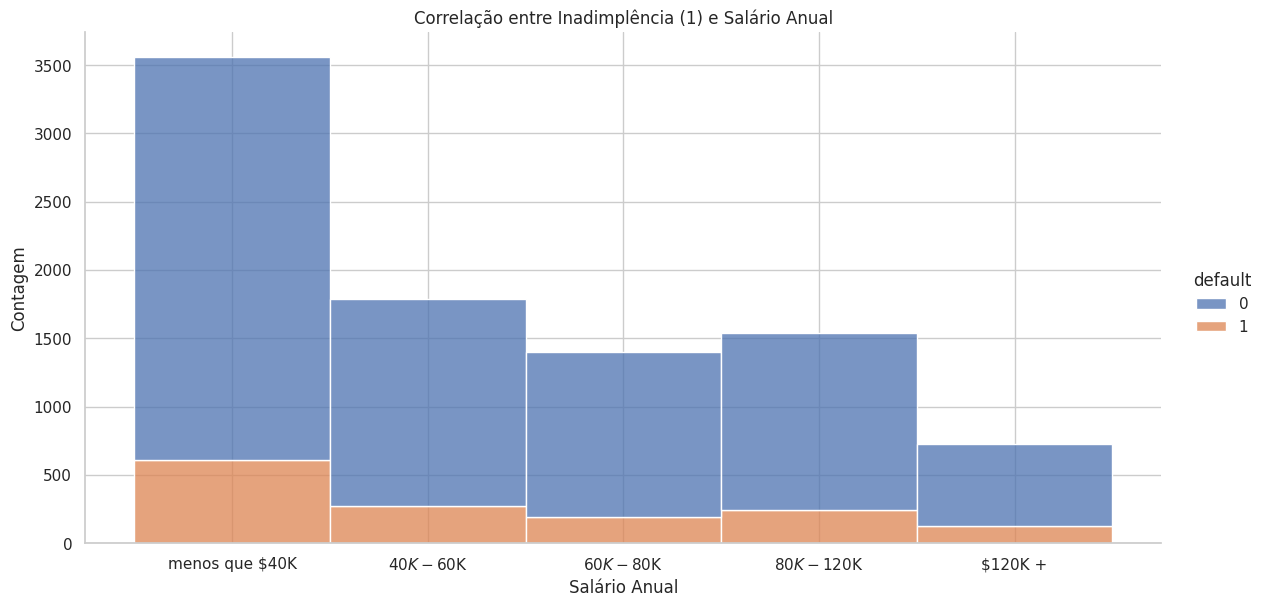

In [67]:
# Ordernar as categorias do salário anual
ordem_salario_anual = ['menos que $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
df['salario_anual'] = pd.Categorical(df['salario_anual'], categories=ordem_salario_anual, ordered=True)

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Criar o displot
sns.displot(data=df, x='salario_anual', hue='default', multiple='stack', height=6, aspect=2)

# Adicionar rótulos e título
plt.title('Correlação entre Inadimplência (1) e Salário Anual')
plt.xlabel('Salário Anual')
plt.ylabel('Contagem')
plt.show()

In [68]:
# Calcular a contagem total de adimplentes e inadimplentes por salário anual
contagem_adimplentes_inadimplentes_por_salario = df.groupby(['salario_anual', 'default']).size().unstack()

# Reordenar as colunas na ordem desejada
contagem_adimplentes_inadimplentes_por_salario = contagem_adimplentes_inadimplentes_por_salario.loc[ordem_salario_anual]

# Calcular a porcentagem de inadimplentes
contagem_adimplentes_inadimplentes_por_salario['Porcentagem Inadimplentes'] = (
    contagem_adimplentes_inadimplentes_por_salario[1] /
    (contagem_adimplentes_inadimplentes_por_salario[0] + contagem_adimplentes_inadimplentes_por_salario[1]) * 100)

# Exibir os resultados
for salario, (adimplentes, inadimplentes, porcentagem) in contagem_adimplentes_inadimplentes_por_salario.iterrows():
    print(f'{salario}: {adimplentes} adimplentes e {inadimplentes} inadimplentes. Porcentagem de inadimplentes: {porcentagem:.2f}%')

menos que $40K: 2949.0 adimplentes e 612.0 inadimplentes. Porcentagem de inadimplentes: 17.19%
$40K - $60K: 1519.0 adimplentes e 271.0 inadimplentes. Porcentagem de inadimplentes: 15.14%
$60K - $80K: 1213.0 adimplentes e 189.0 inadimplentes. Porcentagem de inadimplentes: 13.48%
$80K - $120K: 1293.0 adimplentes e 242.0 inadimplentes. Porcentagem de inadimplentes: 15.77%
$120K +: 601.0 adimplentes e 126.0 inadimplentes. Porcentagem de inadimplentes: 17.33%


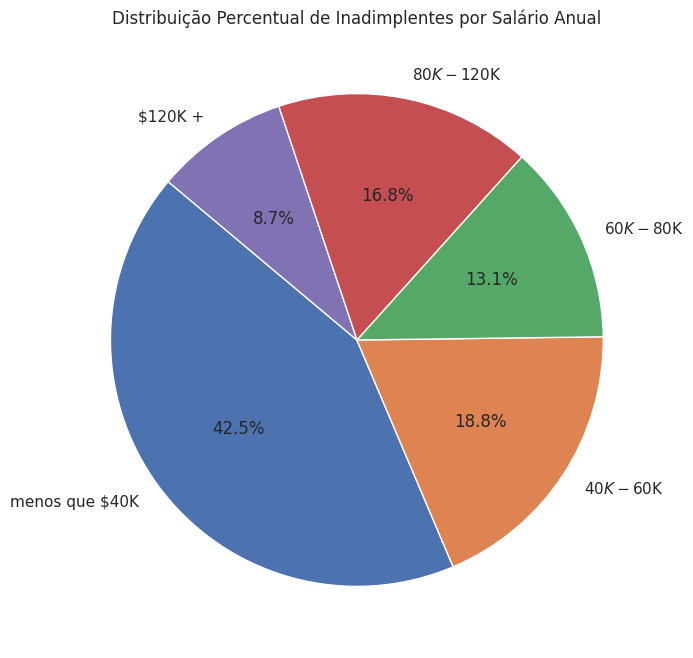

In [69]:
# Calcular o total de inadimplentes
total_inadimplentes = contagem_adimplentes_inadimplentes_por_salario[1].sum()

# Criar um gráfico de pizza para mostrar a distribuição percentual de inadimplentes por grau de salario
plt.figure(figsize=(10, 8))
plt.pie(contagem_adimplentes_inadimplentes_por_salario[1], labels=contagem_adimplentes_inadimplentes_por_salario.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Percentual de Inadimplentes por Salário Anual')
plt.show()

Podemos analisar que o percentual de inadimplentes dentro de cada faixa salarial não chega a ser relevante quando comparados entre si, portanto **não influencia** na probabilidade de ser inadimplente ou não. Contudo, assim como com a escolaridade, temos uma base de inadimplentes alta na faixa salarial abaixo de $40K. É onde se concentra a maioria dos clientes da empresa e provavelmente onde seria uma boa estratégia focar em renegociações.

## 4\. Conclusão

Através dos dados informados referentes a empresa em questão, podemos analisar que alguns cuidados e ações devem ser tomadas para minimizar os efeitos das inadimplências da base de clientes.

Primeiramente, nota-se que clientes que movimentam mais de R$11.000,00 no período de 12 meses não constam na base de inadimplentes. Estes clientes compõem uma classe a parte nesta base de dados, onde as medidas a serem tomadas podem ser mais cuidadosas e experimentais. É possível tomar uma estratégia mais agressiva, começando a ofertar produtos mais arriscados e verificar até que ponto estes se mantém adimplentes. Ademais, são clientes muito importantes e que devem ser mantidos próximos por sua constância, volume e adimplência.

O próximo bloco de análise refere-se ao grau de escolaridade dos clientes e sua correlação com a inadimplência. Verifica-se que pouco podemos considerar neste caso, pois as porcentagens variam quase sem relevância, exceto na classe 'doutorado'. Apesar de pouca variação, pode-se verificar um planejamento ou ofertas diferenciadas para que estes tenham algumas condições especiais após análise mais aprofundada de perfil. O enfoque neste caso deve ser maior nas escolaridades 'ensino medio' e 'mestrado' por apresentarem uma base maior de clientes inadimplentes. Através da informação da escolaridade é possível planejar algumas ações que estejam mais de acordo com o público alvo.

Por fim, os dados obtidos sobre salário anual vão na contramão da crença de que quanto menor o salário, maior a probabilidade de ser inadimplente. Verifica-se que, em porcentagem, tanto a faixa de até 40k quanto a acima de 120k apresentam inadimplências. Isso indica que não deve ser um dado relevante nas análises até o momento, mas que, assim como no grau de escolaridade, devem ser dadas devidas atenções à base de inadimplentes de maior volume. A faixa de menos de 40k representa 42,5% do total de inadimplentes, o que indica que a empresa pode tomar decisões focadas neste grupo.